In [2]:
import numpy as np 
import pandas as pd
import random as rm
import math
import matplotlib.pyplot as plt
# shift + enter to run cells
# python3 -m pip install til at installere moduler

[0.13674121 0.27943642 0.71140422 0.88855092 0.72684911 0.30010975
 0.81469475 0.41418223 0.34706539 0.55253364]


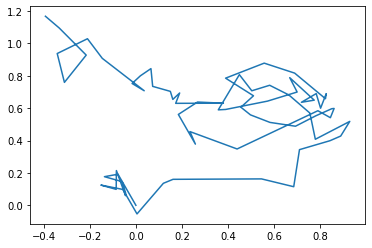

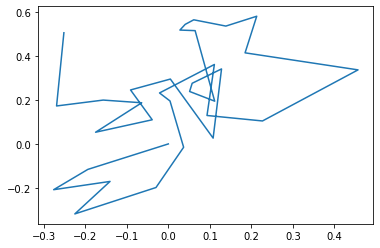

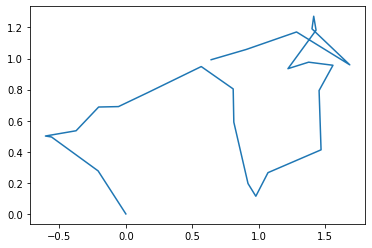

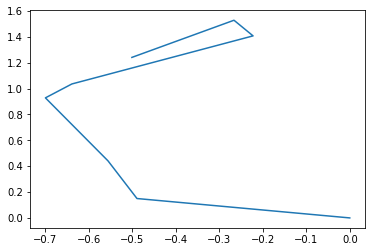

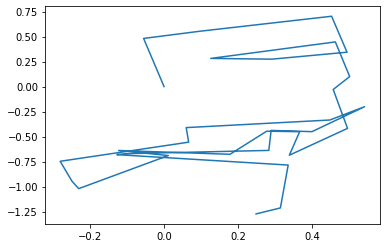

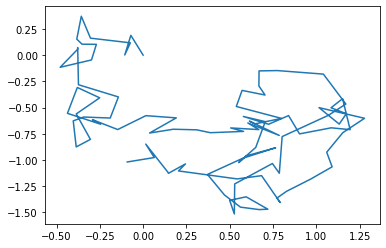

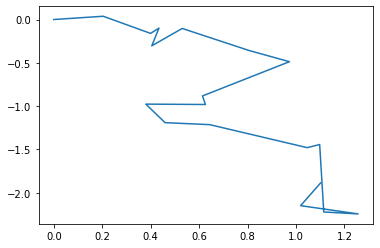

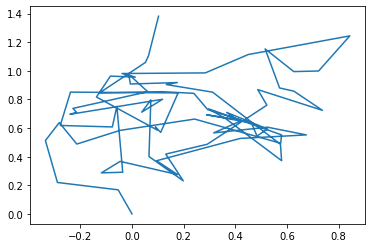

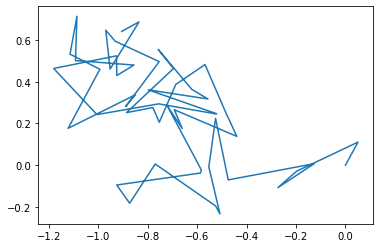

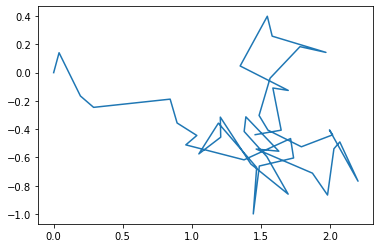

In [8]:
x0 = 0 
y0 = 0
num_tracks = 10
track_length = np.random.randint(5,100,size=num_tracks) 
#print(track_length)

D_track = np.random.uniform(low = 10**-3, high = 1, size=(num_tracks))
#print(D_track)
# D = np.reshape(np.repeat(D_track,track_length),(num_tracks,track_length))
dt = 1/30 # ca. 36 milli sec irl, kameratid åbent 

tracks = []
for i in range(num_tracks):
    D = D_track[i]
    l = track_length[i]
    #print(D)
    
    two_D_t = 2*D*dt
    # pixel i kameraet = 180 nm, 220 pixels 
    step_x = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=l)
    #print(step_x)
    step_y = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=l)
    #print(step_y)
    
    def sim1 (x,y,step_x,step_y):
        y_f = np.concatenate([[y],np.cumsum(step_y)])
        x_f = np.concatenate([[x],np.cumsum(step_x)])
        return np.array([x_f,y_f])
    
    location = sim1(x0,y0,step_x,step_y)
    tracks.append(location)
    plt.figure()
    plt.plot(location[0],location[1])   

    
print(D_track)


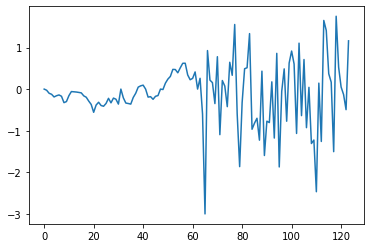

In [4]:
# Spredningen på noise?
x_f = np.array([np.concatenate([[x0],np.cumsum(step_x)])])
y_f = np.array([np.concatenate([[y0],np.cumsum(step_y)])])
x_noise = x_f+np.random.normal(loc=0.0, scale=1.0, size = x_f.shape)
y_noise = y_f+np.random.normal(loc=0.0, scale=1.0, size = y_f.shape)
loc_with_noise = np.append(location, np.array([x_noise,y_noise]))

plt.plot(loc_with_noise)